In [311]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
import numpy as np
import joblib

In [275]:
data_df = pd.read_csv('Clean_Chess_Data.csv')

In [276]:
target = data_df['Winner']
feature = data_df.drop(data_df['Winner'])
decoded_data = data_df.copy()

In [ ]:
# Load the encoders
label_encoder = joblib.load('label_encoder.pkl')
ordinal_encoder = joblib.load('ordinal_encoder.pkl')
onehot_encoder = joblib.load('onehot_encoder.pkl')

# Decode the label-encoded columns (one column at a time)
def decode_label_encoded_columns(df, encoder):
    """
    Decode label encoded columns one by one (as LabelEncoder only works with 1D arrays).
    Returns a DataFrame with decoded values for the columns.
    """
    label_columns = ['Winner', 'Opening_Eco','Opening_Name', 'Moves']
    
    # Create an empty dictionary to store the decoded columns
    decoded_columns = {}
    
    for col in label_columns:
        decoded_columns[col] = encoder.inverse_transform(df[col].values)
    
    # Convert the decoded columns dictionary into a DataFrame
    decoded_df = pd.DataFrame(decoded_columns)
    
    return decoded_df

# Decode all label columns
decoded_label_data = decode_label_encoded_columns(data_df, label_encoder)

# Access the decoded columns for label encoding
decoded_winner = decoded_label_data['Winner']
decoded_opening_name = decoded_label_data['Opening_Name']
decoded_opening_eco = decoded_label_data['Opening_Eco']
decoded_moves = decoded_label_data['Moves']

# Decode One-Hot Encoded columns back (for interpretation purposes)
def decode_onehot_encoded_columns(df, encoder):
    """
    Decode One-Hot encoded columns.
    Returns a DataFrame with the original values for the columns.
    """
    # Get the original column names (this is important to reconstruct the original column)
    original_column_names = encoder.get_feature_names_out(['Moves'])

    # Reverse the transformation to get the original 'Moves' values
    decoded_values = encoder.inverse_transform(df[original_column_names])

    # Convert the decoded values into a DataFrame
    decoded_df = pd.DataFrame(decoded_values, columns=['Moves'])
    
    return decoded_df

# Decode all one-hot encoded columns
decoded_moves_data = decode_onehot_encoded_columns(data_df, onehot_encoder)

# Access the decoded 'Moves' column
decoded_moves = decoded_moves_data['Moves']

# Decode the ordinal-encoded columns (already provided earlier)
def decode_ordinal_encoded_columns(df, encoder):
    """
    Decode all ordinal encoded columns (which were trained together).
    Returns a DataFrame with decoded values for the columns.
    """
    ordinal_columns = ['Rated_(T/F)', 'Game_Status', 'White_Rating_Tier', 'Black_Rating_Tier']
    
    # Pass the entire subset of ordinal columns to the inverse_transform method
    decoded_values = encoder.inverse_transform(df[ordinal_columns].values)
    
    # Convert the decoded values into a DataFrame to easily access specific columns later
    decoded_df = pd.DataFrame(decoded_values, columns=ordinal_columns)
    
    return decoded_df

# Decode all ordinal columns
decoded_ordinal_data = decode_ordinal_encoded_columns(data_df, ordinal_encoder)

# Access the decoded columns for ordinal encoding
decoded_game_status = decoded_ordinal_data['Game_Status']
decoded_rated_tf = decoded_ordinal_data['Rated_(T/F)']
decoded_white_tier = decoded_ordinal_data['White_Rating_Tier']
decoded_black_tier = decoded_ordinal_data['Black_Rating_Tier']


C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_7316\3816431032.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


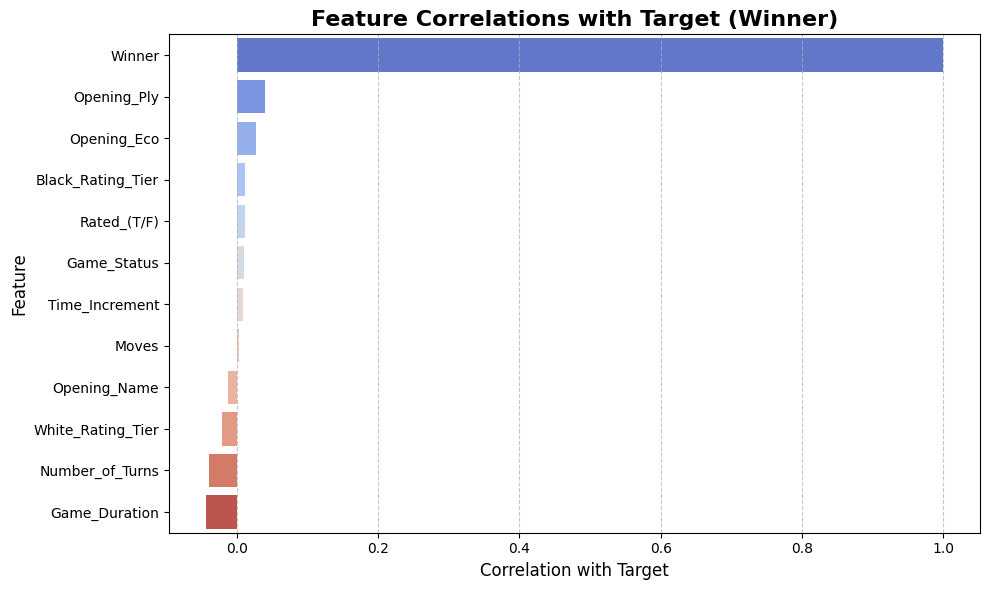

In [278]:
# Calculate correlation between features and the target variable
correlation_with_target = data_df.corrwith(target)

# Sort the correlation values in descending order
correlation_with_target_sorted = correlation_with_target.sort_values(ascending=False)

# Print the correlation with the target variable
# Improved Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_with_target_sorted.values, 
    y=correlation_with_target_sorted.index, 
    palette='coolwarm'
)
plt.title("Feature Correlations with Target (Winner)", fontsize=16, fontweight='bold')
plt.xlabel("Correlation with Target", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Observations:
### 1. *Winner* has the highest correlation with itself, which is expected since it’s the target variable.
### 2. *Opening_Eco* (opening classification) and *Opening_Ply* (number of moves in the opening phase) show moderate correlations, suggesting that opening strategy may influence game outcomes.
### 3. Other features like *Black_Rating_Tier* and *White_Rating_Tier* have weaker correlations, implying player ratings don't strongly predict the winner.
### 4. Features like *Game_Duration*, *Number_of_Turns*, and *Moves* have negligible correlations, indicating they are less relevant for predicting the winner.

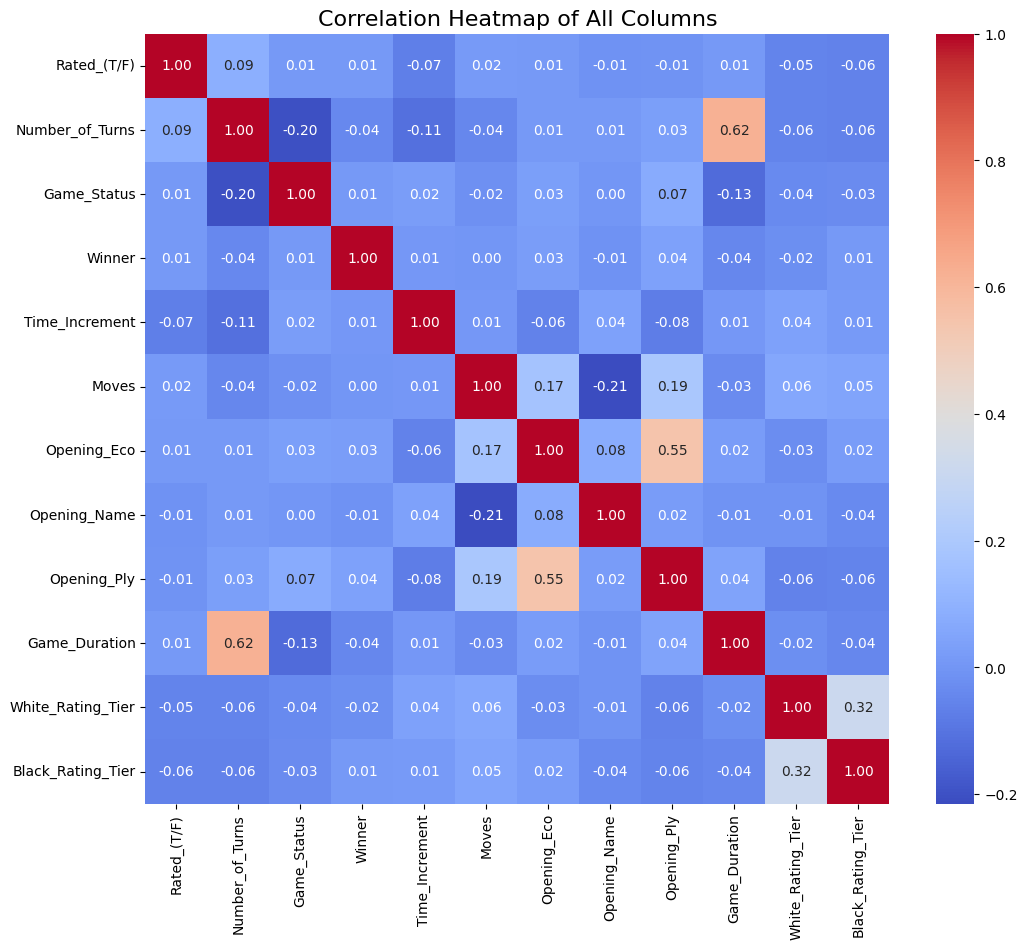

In [279]:
# Assuming 'df' is your DataFrame with numerical data
# Step 1: Compute correlation matrix
correlation_matrix = data_df.corr()

# Step 2: Plot heatmap
plt.figure(figsize=(12, 10))  # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Step 3: Customize and show plot
plt.title("Correlation Heatmap of All Columns", fontsize=16)
plt.show()

### **1. Correlation Heatmap**
- **Overview**: The heatmap displays the correlation coefficients between all features in the dataset. 
- **Key Insights**:
  - `White_Rating` and `Black_Rating` have a strong positive correlation (**0.63**), suggesting players of similar skill levels often compete.
  - Features such as `Opening_Ply` and `Opening_Eco` show moderate correlation (**0.5**) with each other.
  - Most other features have weak or no correlation (close to **0**), indicating limited linear relationships between them.


In [280]:
data_df.columns

Index(['Rated_(T/F)', 'Number_of_Turns', 'Game_Status', 'Winner',
       'Time_Increment', 'Moves', 'Opening_Eco', 'Opening_Name', 'Opening_Ply',
       'Game_Duration', 'White_Rating_Tier', 'Black_Rating_Tier'],
      dtype='object')

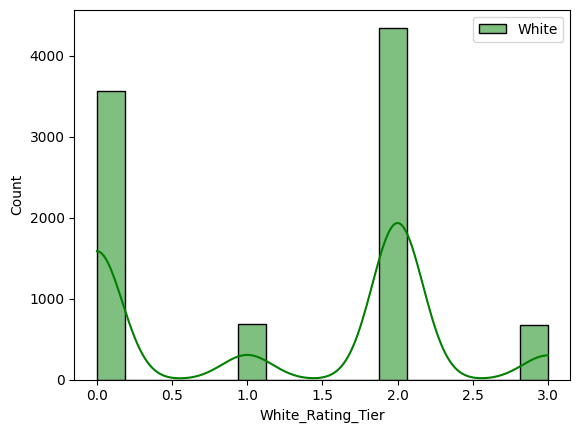

In [281]:
sns.histplot(data_df['White_Rating_Tier'], kde=True, color='green', label='White')
plt.legend()

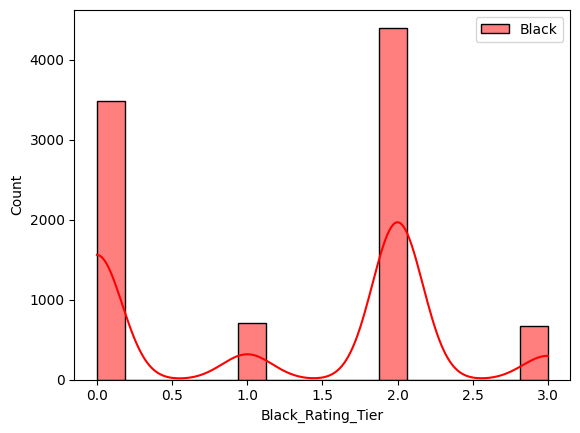

In [282]:
sns.histplot(data_df['Black_Rating_Tier'], kde=True, color='red', label='Black')
plt.legend()

<Axes: xlabel='Winner', ylabel='count'>

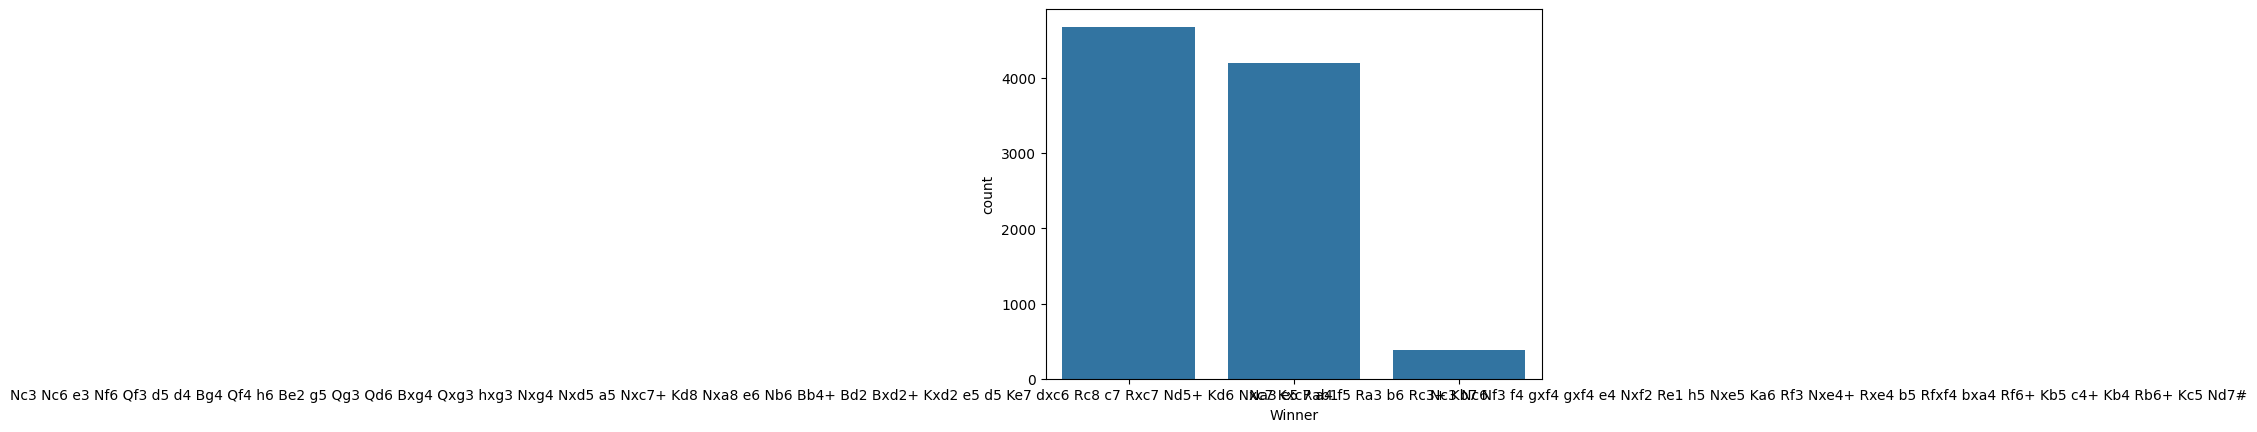

In [310]:
sns.countplot(data=data_df, x=decoded_winner)

### Game Outcomes Summary

The bar plot visualizes the distribution of game outcomes based on the winner:

- **White Wins**: The most frequent outcome, occurring over 5000 times.
- **Black Wins**: Slightly less frequent than white wins, with just under 5000 occurrences.
- **Draws**: The least common outcome, occurring significantly less often than wins.

This indicates that most games result in a decisive victory (either white or black), while draws are relatively rare.


In [284]:
print(decoded_data['Winner'].value_counts())
print(data_df[['Black_Rating_Tier', 'White_Rating_Tier']].head())


Winner
2    4680
0    4198
1     386
Name: count, dtype: int64
   Black_Rating_Tier  White_Rating_Tier
0                2.0                2.0
1                2.0                2.0
2                2.0                2.0
3                2.0                2.0
4                2.0                1.0


<Axes: xlabel='Winner', ylabel='White_Rating_Tier'>

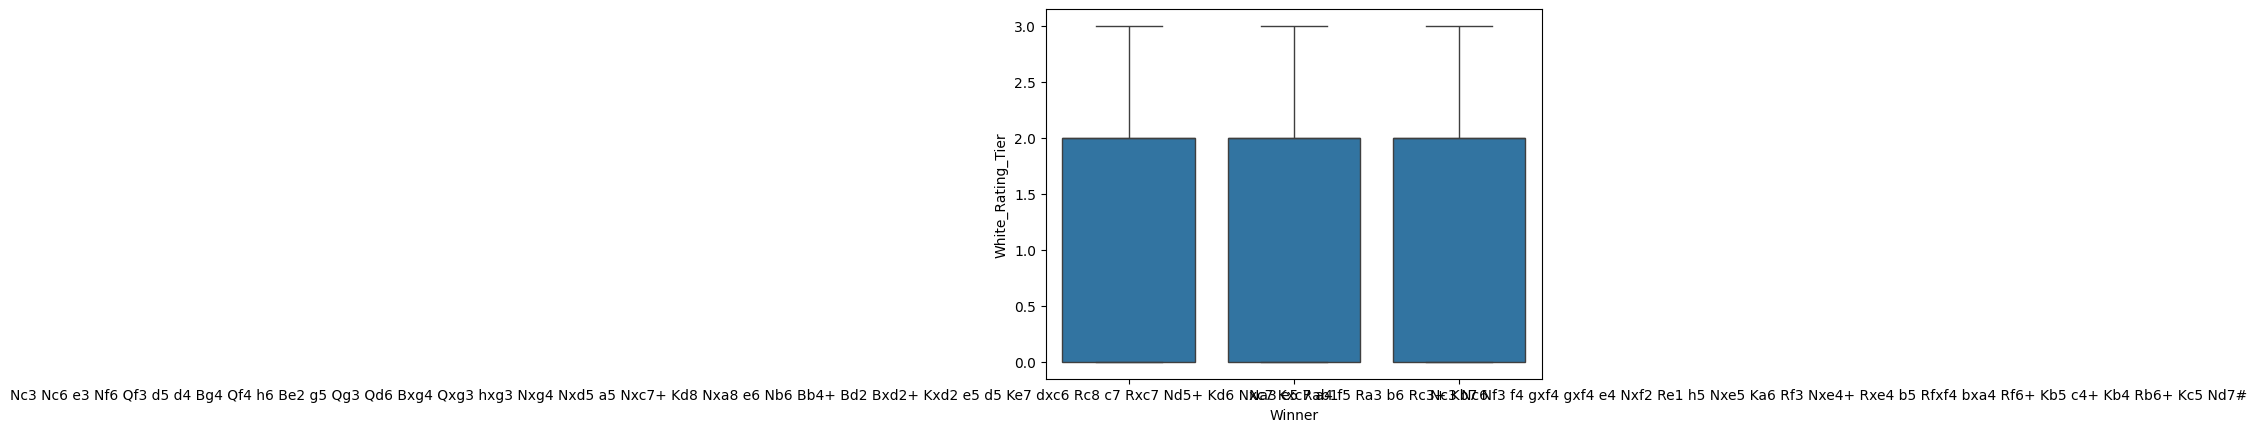

In [285]:
sns.boxplot(data=data_df, x=decoded_winner, y='White_Rating_Tier')

### White Rating Distribution by Game Outcome

The box plot compares the distribution of **White Rating** across game outcomes:

- **White Wins**: The median rating is higher compared to draws and black wins. There are several outliers with very high ratings.
- **Black Wins**: The median rating is similar to white wins, with slightly lower variation. Outliers with high ratings are present.
- **Draws**: The median is comparable to the other outcomes, but the range and interquartile range are broader, indicating more variability.

This suggests that players with higher ratings are often involved in decisive games, while draws have a wider range of ratings.


<Axes: xlabel='Winner', ylabel='Black_Rating_Tier'>

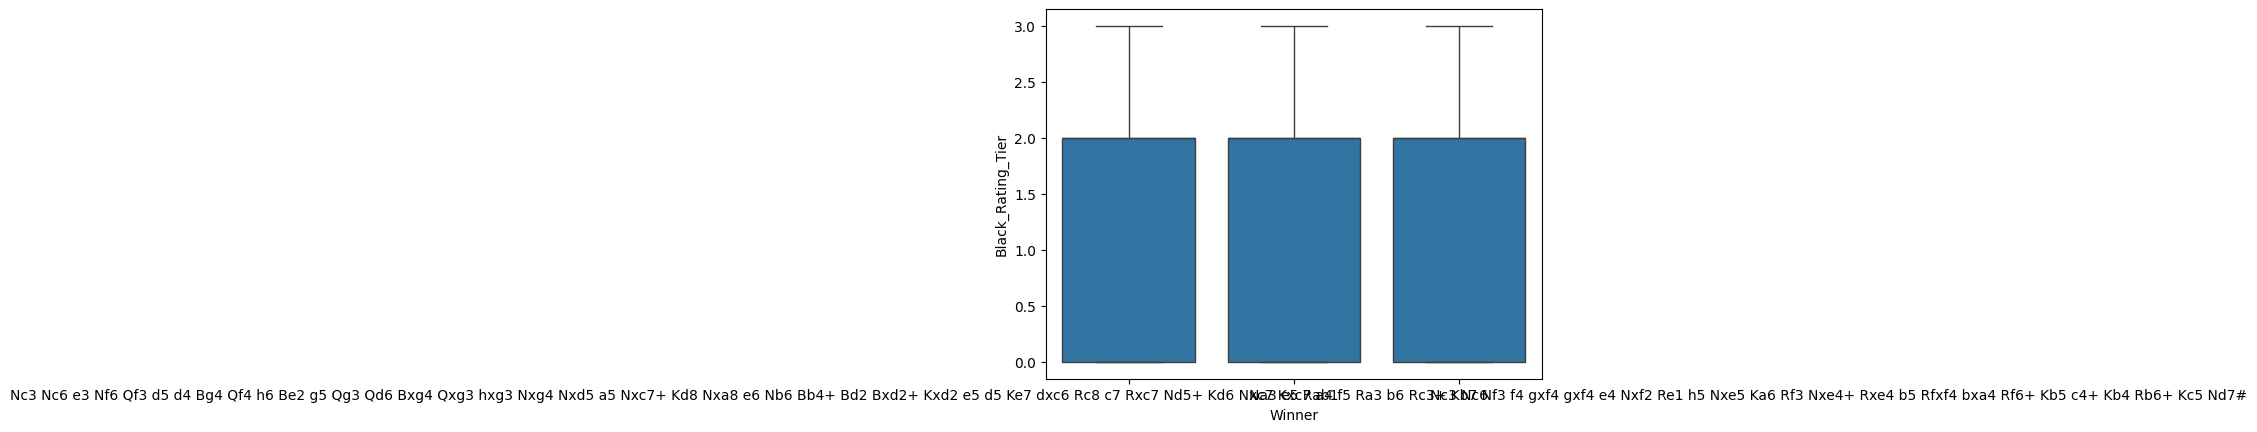

In [286]:
sns.boxplot(data=data_df, x=decoded_winner, y='Black_Rating_Tier')

### Analysis of Black Ratings by Game Outcome

The boxplot shows the distribution of Black player ratings across three outcomes: **white wins**, **black wins**, and **draws**.

- **Median Ratings**: Similar across all outcomes, with draws showing a slightly higher median.
- **Spread**: Consistent interquartile range (IQR) across outcomes, with most ratings between 1250 and 2000.
- **Outliers**: Higher-rated players (above 2200) appear as outliers in all outcomes, indicating occasional upsets or balanced matches.

This suggests that Black player ratings are relatively consistent across outcomes, with draws possibly involving stronger players. Further analysis could include White ratings or other influencing factors.


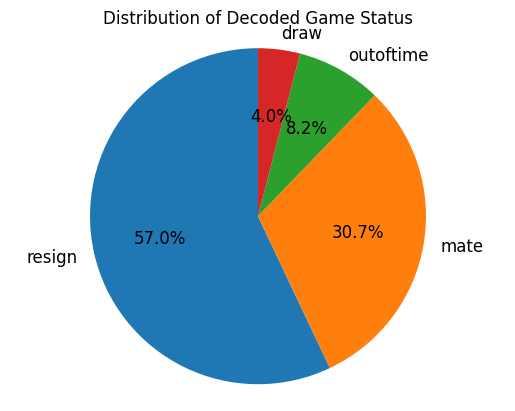

In [287]:
game_status_counts = decoded_game_status.value_counts()

# Plot the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(game_status_counts, 
                                  labels=game_status_counts.index, 
                                  autopct='%1.1f%%', 
                                  startangle=90, 
                                  textprops={'fontsize': 12})

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  
plt.title('Distribution of Decoded Game Status')

# Display the plot
plt.show()



### Distribution of Game Outcomes

The pie chart displays the distribution of game outcomes based on their status:

- **Resign (56.7%)**: The majority of games end with one player resigning.
- **Mate (29.9%)**: A significant portion of games conclude with a checkmate.
- **Out of Time (8.8%)**: Some games are decided by one player running out of time.
- **Draw (4.6%)**: Draws account for the smallest proportion of outcomes.

This indicates that most games conclude decisively, with resignations being the most common outcome.


<Axes: xlabel='Time_Increment', ylabel='Game_Duration'>

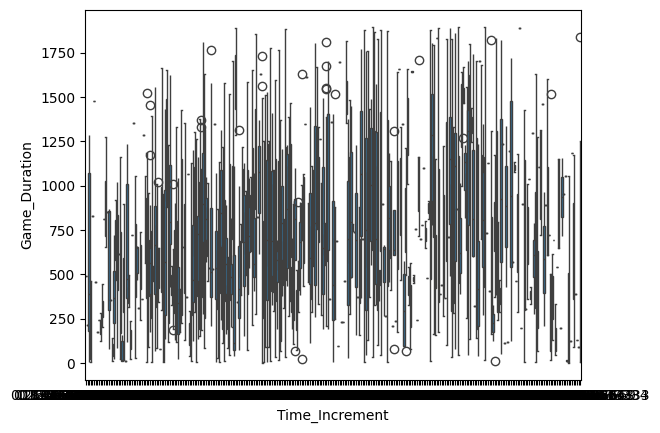

In [288]:
sns.boxplot(data=data_df, x='Time_Increment', y='Game_Duration')

### Analysis of Game Duration vs. Time Increment

The scatter plot illustrates the relationship between **Time Increment** and **Game Duration**:

- **Outliers**: A few extreme values for game duration are visible, significantly deviating from the majority of data points.
- **Concentration**: Most games have a short duration and are clustered near lower time increments.
- **Scale Issue**: The dense clustering at the bottom suggests that the y-axis scale is heavily influenced by outliers, making it harder to analyze the majority of data.

#### Insights:
- Removing or rescaling outliers could provide a clearer view of the general trend between time increment and game duration.


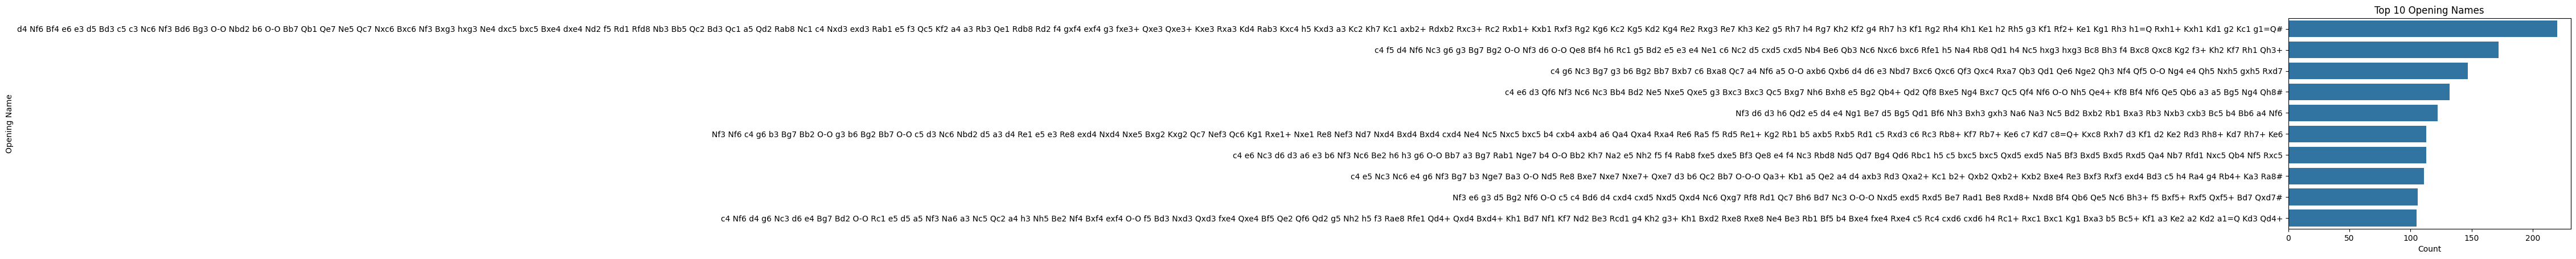

0    c4 e5 g3 c6 Bg2 d5 e3 e4 cxd5 cxd5 Nc3 Nf6 Nge...
1    c4 e5 Nc3 Bc5 g3 Nf6 Bg2 Nc6 e4 Qe7 Nge2 Bxf2+...
2    Nf3 d5 e3 Nf6 b3 b6 Bb2 c5 d4 e6 c4 Bb7 Be2 Be...
3    d4 Nf6 Bf4 e6 e3 d5 Bd3 c5 c3 Nc6 Nf3 Bd6 Bg3 ...
4    c4 e5 g3 c6 Bg2 d5 e3 e4 cxd5 cxd5 Nc3 Nf6 Nge...
Name: Opening_Name, dtype: object
['c4 e5 g3 c6 Bg2 d5 e3 e4 cxd5 cxd5 Nc3 Nf6 Nge2 Be7 d3 exd3 Qxd3 Be6 Nf4 Ne4 Nfxd5 Nxc3 bxc3 O-O Nxe7+ Qxe7 Bxb7 Qxb7 O-O Nc6 Ba3 Rfd8 Qe4 Bd5 Qf5 Qa6 Be7'
 'c4 e5 Nc3 Bc5 g3 Nf6 Bg2 Nc6 e4 Qe7 Nge2 Bxf2+ Kxf2 Qc5+ Ke1 Ng4 d4 exd4 Nd5 O-O h3 d3 hxg4 dxe2 Qxe2 Qd6 Bf4 Nd4 Bxd6 Nxe2 Kxe2 cxd6 Ne7+ Kh8 Nxc8 Raxc8 b3 Rfe8 Ke3 g6 g5 f5 Rad1 fxe4 Bxe4 a6 Kd3 b5 Bd5 bxc4+ Bxc4 a5 Kc2 Rf8 Rxd6 Rf2+ Kb1 Rc7 Rxg6'
 'Nf3 d5 e3 Nf6 b3 b6 Bb2 c5 d4 e6 c4 Bb7 Be2 Be7 O-O O-O Nc3 Nbd7 Rc1 Re8 h3 Rc8 Nb5 a6 Nc3 cxd4 exd4 h6 Qd2 Bf8 cxd5 exd5 Rfe1 Ne4 Nxe4 dxe4 Nh2 Bd6 Ng4 f5 Ne3 f4 Bc4+ Kh8 Nc2 Qg5 d5 Be5 Bxe5 Nxe5 Qd4 Nf3+'
 'd4 Nf6 Bf4 e6 e3 d5 Bd3 c5 c3 Nc6 Nf3 Bd6 Bg3 O-O Nbd2 b6 O-O Bb7 Qb1 

In [289]:
# Now, calculate the top 10 most frequent openings
top_openings = decoded_opening_name.value_counts().head(10)

# Create the bar plot for top openings
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=top_openings.values, y=top_openings.index)
plt.title("Top 10 Opening Names")
plt.xlabel("Count")
plt.ylabel("Opening Name")
plt.show()
print(decoded_opening_name.head())
print(decoded_opening_name.unique())  # This will show all unique values



In [290]:
print(data_df.columns)  # List all columns to ensure 'Opening_Name' exists
print(data_df['Opening_Name'].head())# Check the first few values of the opening names column
print(decoded_opening_name.head())
print(data_df['Opening_Eco'].head())


Index(['Rated_(T/F)', 'Number_of_Turns', 'Game_Status', 'Winner',
       'Time_Increment', 'Moves', 'Opening_Eco', 'Opening_Name', 'Opening_Ply',
       'Game_Duration', 'White_Rating_Tier', 'Black_Rating_Tier'],
      dtype='object')
0    756
1    653
2    221
3    931
4    756
Name: Opening_Name, dtype: int64
0    c4 e5 g3 c6 Bg2 d5 e3 e4 cxd5 cxd5 Nc3 Nf6 Nge...
1    c4 e5 Nc3 Bc5 g3 Nf6 Bg2 Nc6 e4 Qe7 Nge2 Bxf2+...
2    Nf3 d5 e3 Nf6 b3 b6 Bb2 c5 d4 e6 c4 Bb7 Be2 Be...
3    d4 Nf6 Bf4 e6 e3 d5 Bd3 c5 c3 Nc6 Nf3 Bd6 Bg3 ...
4    c4 e5 g3 c6 Bg2 d5 e3 e4 cxd5 cxd5 Nc3 Nf6 Nge...
Name: Opening_Name, dtype: object
0     60
1    180
2    151
3      0
4     60
Name: Opening_Eco, dtype: int64


C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_7316\4191416630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_openings.values, y=top_openings.index, palette="Blues_d")


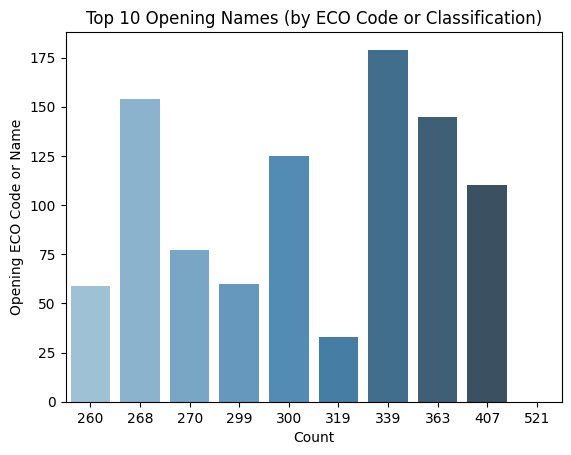

In [291]:
# Now, calculate the top 10 most frequent opening eco codes (or names)
top_openings = data_df['Opening_Eco'].value_counts().head(10)

# Create the bar plot for top openings
sns.barplot(x=top_openings.values, y=top_openings.index, palette="Blues_d")
plt.title("Top 10 Opening Names (by ECO Code or Classification)")
plt.xlabel("Count")
plt.ylabel("Opening ECO Code or Name")
plt.show()


C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_7316\1897621620.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_openings.values, y=top_openings.index, palette="Blues_d")


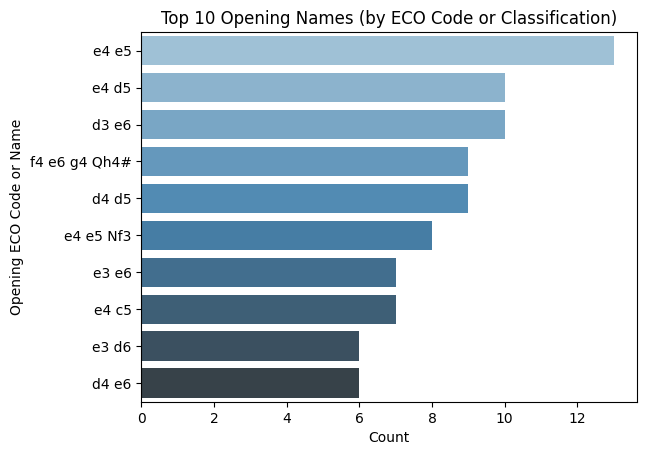

In [292]:
# Now, calculate the top 10 most frequent opening eco codes (or names)
top_openings = decoded_moves.value_counts().head(10)

# Create the bar plot for top openings
sns.barplot(x=top_openings.values, y=top_openings.index, palette="Blues_d")
plt.title("Top 10 Opening Names (by ECO Code or Classification)")
plt.xlabel("Count")
plt.ylabel("Opening ECO Code or Name")
plt.show()


<Axes: xlabel='Opening_Ply', ylabel='White_Rating_Tier'>

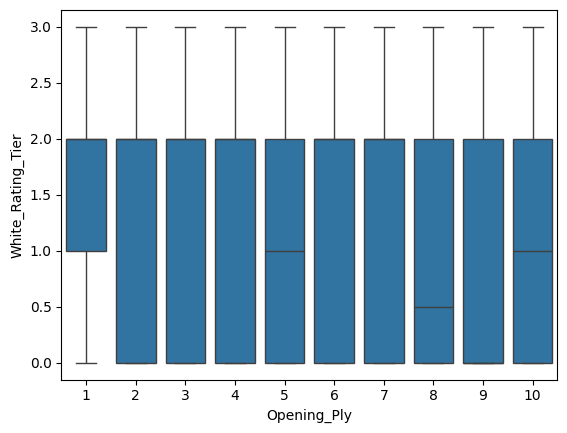

In [293]:
sns.boxplot(data=data_df, x='Opening_Ply', y='White_Rating_Tier')

In [294]:
data_df.columns

Index(['Rated_(T/F)', 'Number_of_Turns', 'Game_Status', 'Winner',
       'Time_Increment', 'Moves', 'Opening_Eco', 'Opening_Name', 'Opening_Ply',
       'Game_Duration', 'White_Rating_Tier', 'Black_Rating_Tier'],
      dtype='object')

<Axes: xlabel='Number_of_Turns', ylabel='Count'>

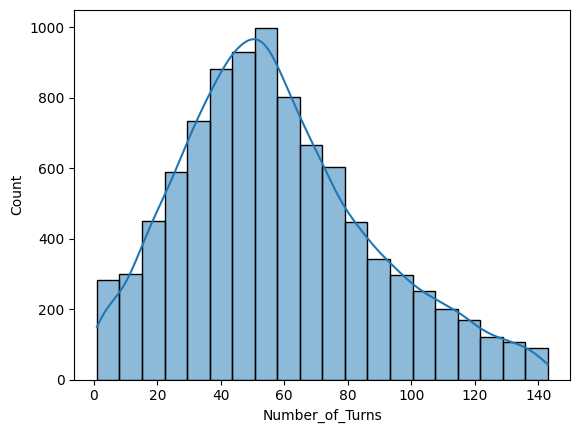

In [295]:
sns.histplot(data_df['Number_of_Turns'], kde=True, bins=20)

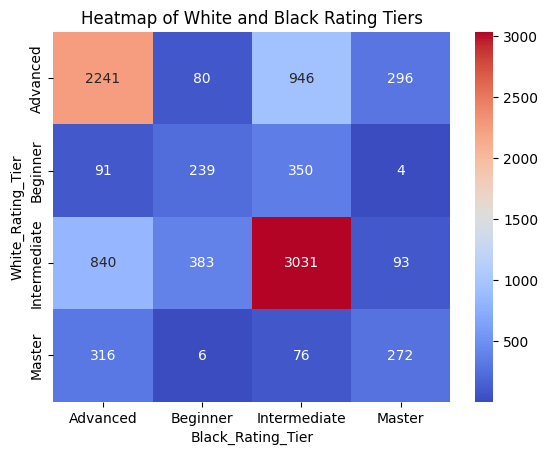

In [296]:
heatmap_data = pd.crosstab(decoded_white_tier, decoded_black_tier)

# Plot the heatmap
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of White and Black Rating Tiers')
plt.show()

<Axes: xlabel='Number_of_Turns', ylabel='Game_Duration'>

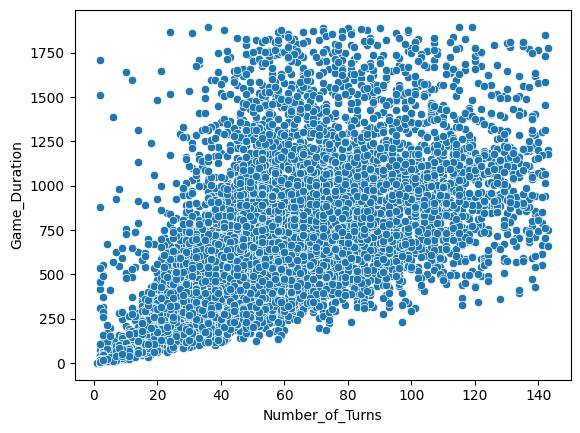

In [297]:
sns.scatterplot(data=data_df, x='Number_of_Turns', y='Game_Duration')

<Axes: xlabel='Opening_Name', ylabel='count'>

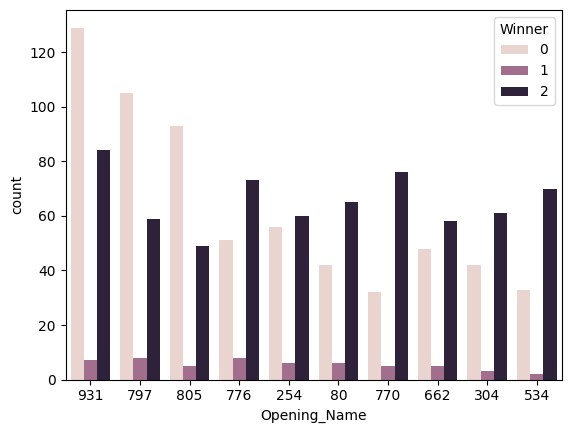

In [298]:
sns.countplot(data=data_df, x='Opening_Name', hue=target, order=data_df['Opening_Name'].value_counts().iloc[:10].index)

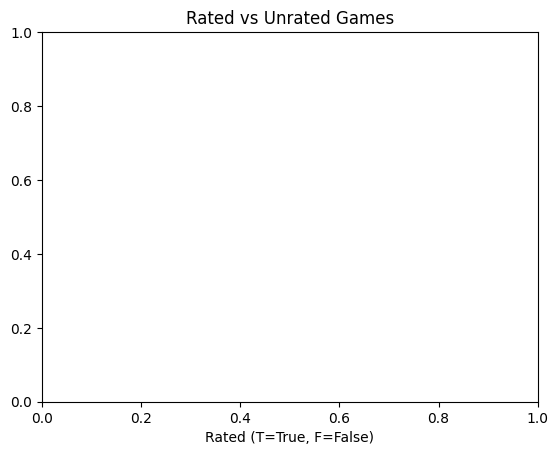

In [299]:
rated_df = pd.DataFrame(decoded_rated_tf, columns=['decoded_rated'])

# Plot the count of rated vs unrated games
sns.countplot(data=rated_df, x='decoded_rated', palette='pastel')
plt.title('Rated vs Unrated Games')
plt.xlabel('Rated (T=True, F=False)')

# Display the plot
plt.show()

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_7316\3661569345.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_df, x=target, y='Number_of_Turns', palette='Set2')


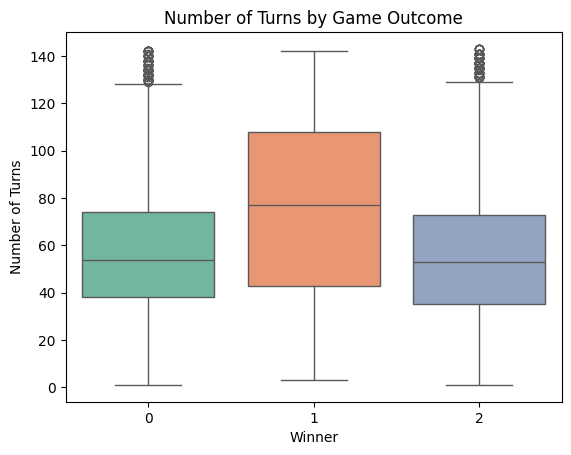

In [300]:
sns.boxplot(data=data_df, x=target, y='Number_of_Turns', palette='Set2')
plt.title('Number of Turns by Game Outcome')
plt.xlabel('Winner')
plt.ylabel('Number of Turns')
plt.show()

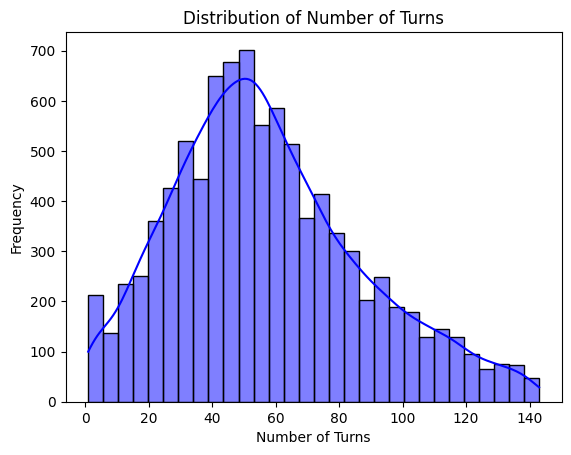

In [301]:
sns.histplot(data=data_df, x='Number_of_Turns', kde=True, color='blue', bins=30)
plt.title('Distribution of Number of Turns')
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')
plt.show()


C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_7316\1352981381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=game_status_counts.index, y=game_status_counts.values, palette='viridis')


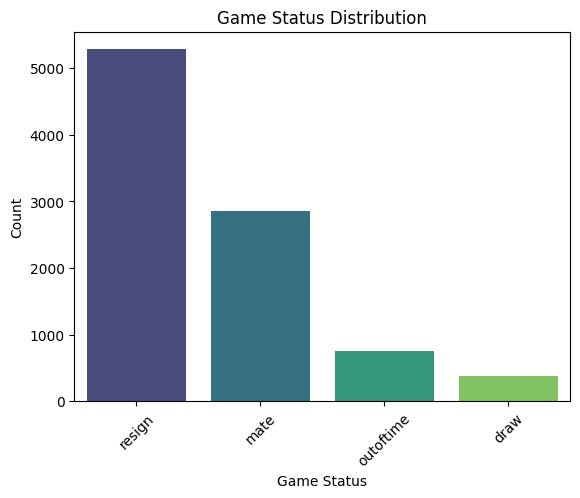

In [302]:
game_status_counts = decoded_game_status.value_counts()
sns.barplot(x=game_status_counts.index, y=game_status_counts.values, palette='viridis')
plt.title('Game Status Distribution')
plt.xlabel('Game Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

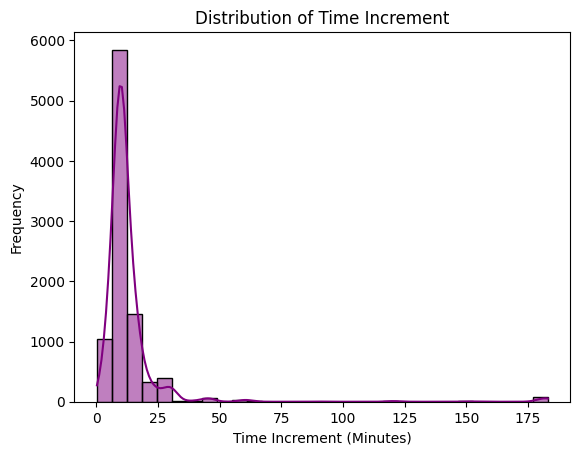

In [303]:
sns.histplot(data=data_df, x='Time_Increment', kde=True, color='purple', bins=30)
plt.title('Distribution of Time Increment')
plt.xlabel('Time Increment (Minutes)')
plt.ylabel('Frequency')
plt.show()

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_7316\4111360735.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_df, x=target, y='White_Rating_Tier', palette='Blues', inner='quartile')


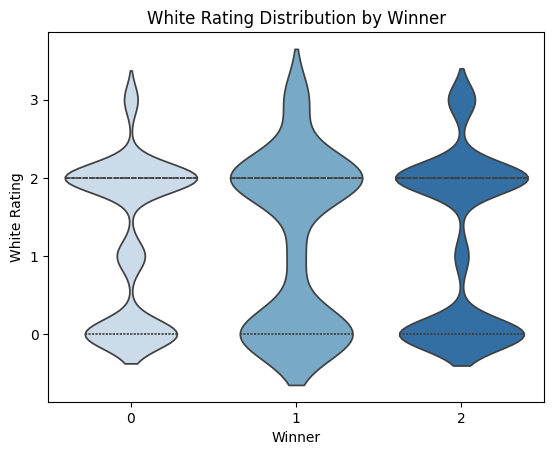

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_7316\4111360735.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_df, x=target, y='Black_Rating_Tier', palette='Reds', inner='quartile')


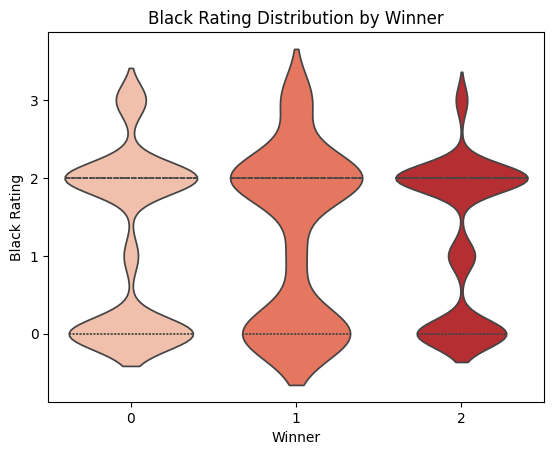

In [304]:
sns.violinplot(data=data_df, x=target, y='White_Rating_Tier', palette='Blues', inner='quartile')
plt.title('White Rating Distribution by Winner')
plt.xlabel('Winner')
plt.ylabel('White Rating')
plt.show()

sns.violinplot(data=data_df, x=target, y='Black_Rating_Tier', palette='Reds', inner='quartile')
plt.title('Black Rating Distribution by Winner')
plt.xlabel('Winner')
plt.ylabel('Black Rating')
plt.show()

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_7316\1923204833.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_df, x='Opening_Eco', order=data_df['Opening_Eco'].value_counts().iloc[:10].index, palette='muted')


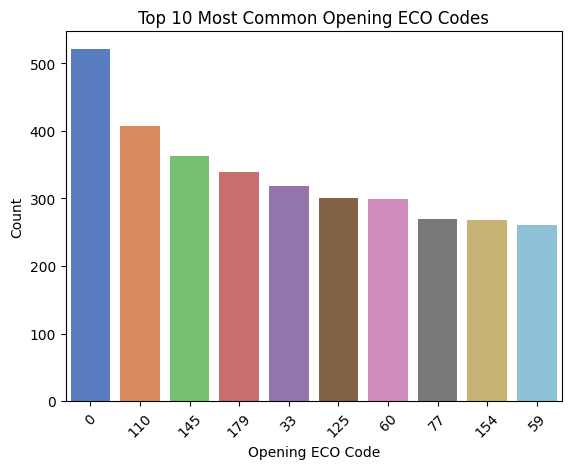

In [305]:
sns.countplot(data=data_df, x='Opening_Eco', order=data_df['Opening_Eco'].value_counts().iloc[:10].index, palette='muted')
plt.title('Top 10 Most Common Opening ECO Codes')
plt.xlabel('Opening ECO Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

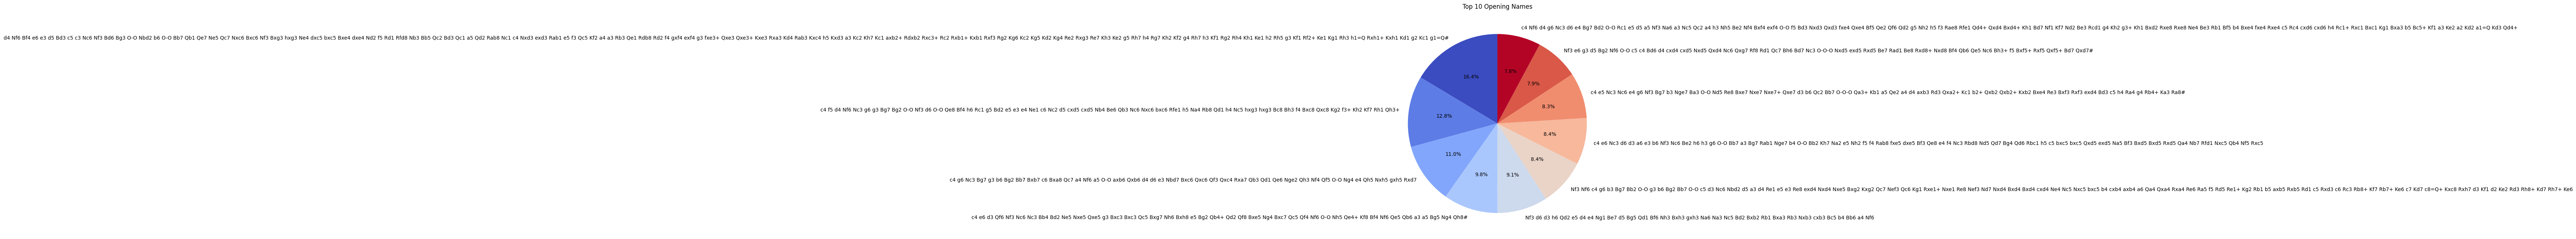

In [306]:
top_openings = decoded_opening_name.value_counts().head(10)
top_openings.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), colormap='coolwarm')
plt.title('Top 10 Opening Names')
plt.ylabel('')  # Remove default y-label
plt.show()

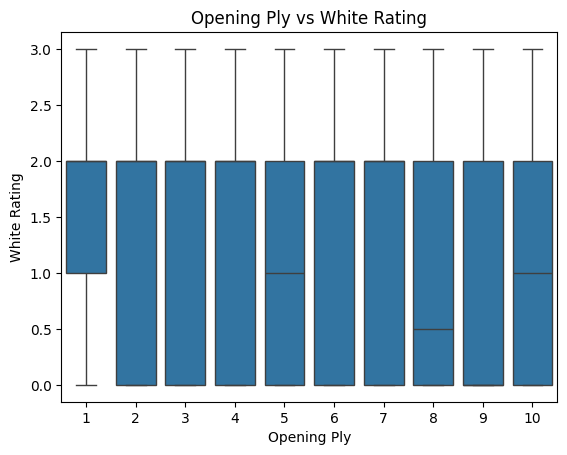

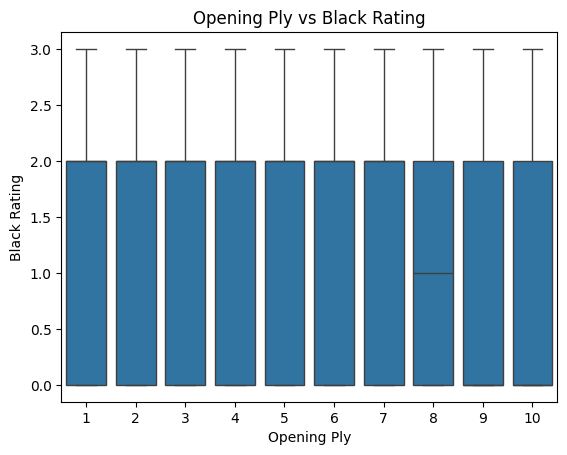

In [307]:
sns.boxplot(data=data_df, x='Opening_Ply', y='White_Rating_Tier')
plt.title('Opening Ply vs White Rating')
plt.xlabel('Opening Ply')
plt.ylabel('White Rating')
plt.show()

sns.boxplot(data=data_df, x='Opening_Ply', y='Black_Rating_Tier')
plt.title('Opening Ply vs Black Rating')
plt.xlabel('Opening Ply')
plt.ylabel('Black Rating')
plt.show()

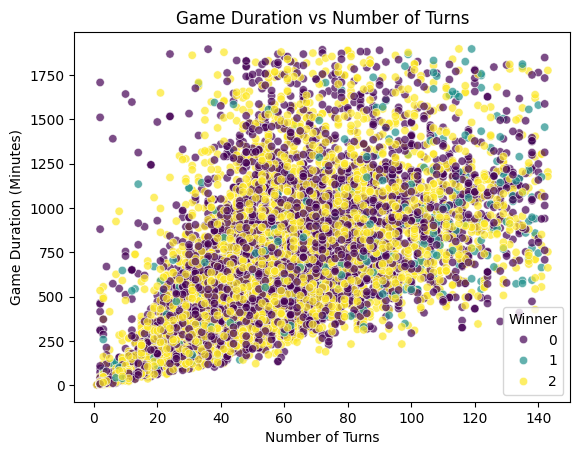

In [308]:
sns.scatterplot(data=data_df, x='Number_of_Turns', y='Game_Duration', hue=target, palette='viridis', alpha=0.7)
plt.title('Game Duration vs Number of Turns')
plt.xlabel('Number of Turns')
plt.ylabel('Game Duration (Minutes)')
plt.show()

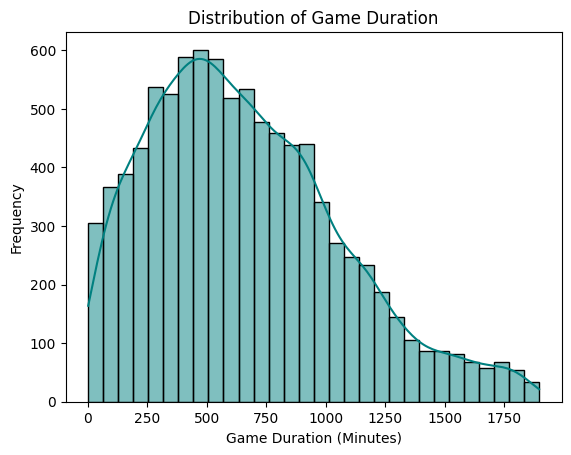

In [309]:
sns.histplot(data=data_df, x='Game_Duration', kde=True, color='teal', bins=30)
plt.title('Distribution of Game Duration')
plt.xlabel('Game Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()